## **Traffic Sign Recognition**
Author : Jean-Marc Le Peuvédic

Key features:
* Reaches 96 percent accuracy on validation set, and 94.8 percent accuracy on TEST set
* Color space conversion layers using 1x1 convolution added as first layers
* Dropout implemented in fully connected layer


---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report




[//]: # (Image References)



## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
###Writeup / README

####1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/lepeuvedic/CarND-Traffic-Sign-Classifier-Project/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

The data set is stored in Pickle file. numpy.ndarrays are directly retrieved from this file. Most statistics below relate directly to the array dimensions. They are calculated using the shape attribute.

I used the pandas library to calculate the number of unique classes of the traffic signs data set:

* The size of training set is 34799, later extended to 59788
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32,32,3)
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.

When examined in greater detail, the dataset apprears unbalanced. The least represented classes have 180 images, while the most represented ones have almost ten times more.


Histogram:
       0    1    2  ClassId                                           SignName
0    180   30   60        0                               Speed limit (20km/h)
1   1980  240  720        1                               Speed limit (30km/h)
2   2010  240  750        2                               Speed limit (50km/h)
3   1260  150  450        3                               Speed limit (60km/h)
4   1770  210  660        4                               Speed limit (70km/h)
5   1650  210  630        5                               Speed limit (80km/h)
6    360   60  150        6                        End of speed limit (80km/h)
7   1290  150  450        7                              Speed limit (100km/h)
8   1260  150  450        8                              Speed limit (120km/h)
9   1320  150  480        9                                         No passing
10  1800  210  660       10       No passing for vehicles over 3.5 metric tons
11  1170  150  420       11              Right-of-way at the next intersection
12  1890  210  690       12                                      Priority road
13  1920  240  720       13                                              Yield
14   690   90  270       14                                               Stop
15   540   90  210       15                                        No vehicles
16   360   60  150       16           Vehicles over 3.5 metric tons prohibited
17   990  120  360       17                                           No entry
18  1080  120  390       18                                    General caution
19   180   30   60       19                        Dangerous curve to the left
20   300   60   90       20                       Dangerous curve to the right
21   270   60   90       21                                       Double curve
22   330   60  120       22                                         Bumpy road
23   450   60  150       23                                      Slippery road
24   240   30   90       24                          Road narrows on the right
25  1350  150  480       25                                          Road work
26   540   60  180       26                                    Traffic signals
27   210   30   60       27                                        Pedestrians
28   480   60  150       28                                  Children crossing
29   240   30   90       29                                  Bicycles crossing
30   390   60  150       30                                 Beware of ice/snow
31   690   90  270       31                              Wild animals crossing
32   210   30   60       32                End of all speed and passing limits
33   599   90  210       33                                   Turn right ahead
34   360   60  120       34                                    Turn left ahead
35  1080  120  390       35                                         Ahead only
36   330   60  120       36                               Go straight or right
37   180   30   60       37                                Go straight or left
38  1860  210  690       38                                         Keep right
39   270   30   90       39                                          Keep left
40   300   60   90       40                               Roundabout mandatory
41   210   30   60       41                                  End of no passing
42   210   30   90       42  End of no passing by vehicles over 3.5 metric ...


[//]: # (Image References)

[image1]: ./examples/db_visual.png "Visualization"

![10 random images from the training set][image1]

Visual exploration of a few images shows that brightness and lighting conditions are extremely variable. Many pictures seem to have been taken by night. This assessment led me to implement an automatic brightness adjustment in the preprocessing stage, and later led me to modify the LeNet-5 neural network architecture to investigate the most appropriate color space conversion.


### Design and Test a Model Architecture

#### 1. Preprocessing

I turned to my mentor to discuss the idea of designing the first layers of the NN, so that the learning algorithm would find the most appropriate color conversion, instead of deciding to go for grayscale. It was not obvious at all that color could be less important than shape, because traffic signs are designed with precise colours that correspond to meaning. Red means danger, blue means mandatory direction, yellow is sometimes used for temporary signs linked to construction work.

My pre-processing has three steps. The first step is a brightness enhancement. It relies on a grayscale version of the image to find the maximum brightness and the mean brightness of a 16x16 pixel central zone. Some images have bright spots, either lights on night time pictures, or sun reflections on the edges of the signs in sunny day shots. If the mean is less the some fraction of the maximum, the algorithm considers that the maximum value is irrelevant, and it scales the RGB values based on the mean.

The preprocessing library includes a recode() function which can change the way images are encoded. It does the second preprocessing step: normalizing pixel values to the interval \[-1, 1\]. It can also change the underlying numeric type, and in this application, changes it to a float32.

Finally, I decided as a late improvement to generate additional data. This was mainly an opportunity because I found a suitable Python function while Googling for information on how to visualize the trained weights. The added step produced a small, but significant improvement of the network accuracy. The generation of additional data is performed last, because the brightness adjustment and encoding conversion are done only once on the original images. The generation of new data is done by flipping symmetric traffic signs, or rotating them 180° in some cases (end of speed limit). Some asymetric signs are also flipped left-to-right, if their symmetric counterpart also exists. For instance, "Keep right" and "Keep left" subsets can each be extended by the horizontally flipped version of the images from the other subset. This last step almost doubles the amount of training data available.


| Original image                       | Image with brightness adjusted                |
|:------------------------------------:|:---------------------------------------------:|
|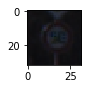    |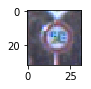           |
|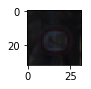    |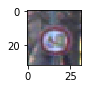           |
|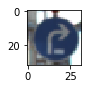    |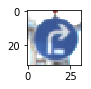           |


#### 2. Final Model Architecture

#Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider #including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 1x1  		| outputs 32x32x6   							| 
| RELU             		|                   							| 
| Convolution 1x1 		| outputs 32x32x6    							| 
| RELU         		    |                   							| 
| Convolution 1x1     	| outputs 32x32x3 image in trained colorspace  	|
| RELU					|												|
| Convolution 3x3	    | outputs 28x28x6   							|
| RELU					|												|
| Max pooling	      	| 2x2 stride, 2x2 kernel, outputs 14x14x6 		|
| Convolution 3x3	    | outputs 10x10x16   							|
| RELU					|												|
| Max pooling	      	| 2x2 stride, 2x2 kernel, outputs 5x5x16 		|
| Fully connected		| 400 in, 120 out								|
| RELU					|												|
| Fully connected		| 120 in, 84 out								|
| RELU					|												|
| Dropout				| Trains with a keep probability of 0.5 		|
| Fully connected		| 84 in, 43 out							    	|
| Softmax				|         									    |
 
The first three layer are distinctly separated from the rest of the network because the tensor variable which connects the two parts is an 32x32 image with three components per pixel. It is no longer a RGB image. The conversion function is potentially non linear, in order to capture chrominance, brigthness, saturation colorspace conversion, or any other.

Trained network visualisation is used later to examine this learned colorspace conversion function, since it would be more efficient to implement it during the preprocessing stage.

#### 3. Model Training

The Adam optimized was used, since it came from the reused LeNet-5 architecture. No other optimised has been tried, since this one gave good results.

For the choice of hyper-parameters, I was guided by the loss and the accuracy on the validation set. The back-propagation algorithm runs once per batch, and tries to change the weights in the direction which improves the accuracy for the current batch. 

In order to get a feeling for the hyperparameters EPOCH, BATCH_SIZE and the Learning Rate, I set EPOCH = 10, BATCH_SIZE = 1000, and I explored the effect of varying the Learning Rate. 
Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

| Learning Rate | Accuracy on validation set |
|:-------------:|:--------------------------:|
|LR = 0.04	    | fails                      |
|LR = 0.02	    | 0.941 (15 Epochs)          |
|LR = 0.01	    | 0.942 (dès 8 Epochs)       |
|LR = 0.004	    | 0.939 (dès 11 Epochs)      |
|LR = 0.002	    | 0.911 (dès 11 Epochs)      |
|LR = 0.001	    | 0.898                      |
|LR = 0.0005	| 0.849 (avec 30 Epochs)     |

This parameter sweep gave me a goof value for the Learning Rate parameter. Since it was the best value, Learning Rate was set to 0.01 and I started a parameter sweep on the batch size, from 64 to 10000 items. A batch size of 1000 images gave the best results. To do this quickly, the number of epochs was kept at a reasonable value of 10. 

Without any change to the network used to recognize letters (LeNet-5), the accuracy was below 90%. But with some research on the best values of the hyper parameters, even this minimally modified well-known implementation reaches the 0.93 accuracy threshold. The validation set is however quite small, and random fluctuation on the order of 1% rendered this result unreliable. 

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93

After finding optimised values of the hyper parameters, the accuracy on the validation set was not consistently above the threshold of 0.93, on the well-known LeNet-5 architecture. The architecture was the one suggested in the course for this project.

My idea was to include a trained image enhancer at the input of the neural network, and to study the learned weights in order to gain insight to the best colorspace conversion for traffic signs recognition.

The weights of those layers are not initialised with random values. Instead they are initialised to the positive and negative variants of the unity diagonal matrix, plus a small random value. This initialisaton makes the added layer initially transparent, and allows the lower layers to receive meaningful imformation.

I sucessively made three changes affecting the accuracy of the class decoding:
* I added the color space conversion entry network based on 1x1 convolutions
* I extended the data set to almost 60 thousand items, and I increased progressively the EPOCHS to 50
* In order to avoid over fitting, I implemented Dropout after the 4th layer (fully connected).

Those three changes allowed my to reach accuracy figure 3 points above the threshold.

They had a slight influence on the hyper parameters. Further tests showed that a batch size of 512 performed better than 1000, and a progressive increase in the number of epochs showed no sign of over-fitting until 50 Epochs. A decrease of the learning rate to 0.001 was not detrimental to the final accuracy of the trained network: the loss decrease was slower at the beginning, but was sustained longer. Loss values lower than 0.010 are achieved at every run. 

My final model results were:
* training set accuracy of 100%
* validation set accuracy of 96% 
* test set accuracy of 94.6%

The training takes roughlty 30 minutes on a NVIDIA K520 Grid GPU installed on an Amazon instance. 

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report

[image4]: ./panneaux/dangerDE_sign.jpg "General danger Sign 1"
[image5]: ./panneaux/Vitesse70FR_sign.jpg "Traffic Sign 2"
[image6]: ./panneaux/InterditAuxBusFR_sign.jpg "Traffic Sign 3"
[image7]: ./panneaux/Vitesse120DE_sign.jpg "Speed limit 120 Sign 4"
[image8]: ./panneaux/NoStoppingDE_sign.jpg "Stopping prohibited Sign 5"
[image9]: ./panneaux/Pente12pctFR_sign.jpg "Twelve percent slope Sign 6"
[image10]: ./panneaux/Vitesse30aLedFR_sign.jpg "Speed limit 30 Sign 7"
[image11]: ./panneaux/SpeedBumpAheadFR_sign.jpg "Speed bump ahead Sign 8"
[image12]: ./panneaux/InterditAuxPlus8tFR_sign.jpg "Entry prohibited for vehicles over 8 tons Sign 9"
[image13]: ./panneaux/PedestrianCrossingFR_sign.jpg "Pedestrian crossing ahead Sign 10"

Here are five German traffic signs that I found on the web:

| German traffic signs:                    |
|:-------:|:-----------:|:--------------:|:--------------:|:--------------:|:------------:|
| | ![no stopping][image8] | ![speed limit 120 km/h][image7] | ![general danger][image4] | ![speed limit 30 km/h][image10] | ![speed limit 70 km/h][image5] | 

And five European signs, looking close but slightly different. Drivers are allowed to travel all across Europe without any specific training.

| Five European traffic signs:                    |
|:-------:|:-----------:|:--------------:|:--------------:|:--------------:|:------------:|
| | ![entry prohibited to coaches][image6] | ![twelve percent slope ahead][image9] | ![speed bump ahead][image11] | ![entry prohibited to vehicles weighting more than 8 metric tons][image12] | ![pedestrian crossing ahead][image13]

The first image of the German set might be difficult to classify because there are no parking signs in the training set. All the parking signs are absent from the training set, and the neural network cannot help but associate this new shape to something it knows.

Of course, the learning algorithm has never seen the five non-german European signs, so it will do its best according to the symbols and shapes it can recognize.

#### 2. Discuss the model's predictions on these new traffic signs

and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:
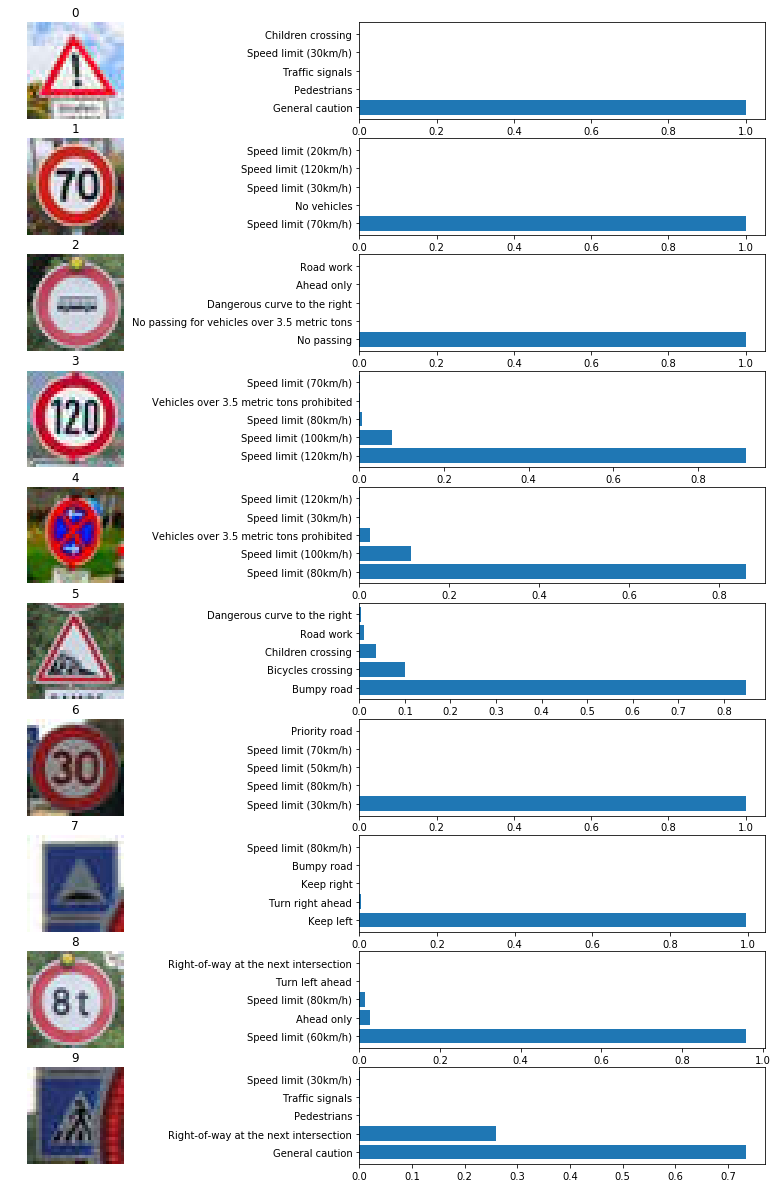

The model was able to correctly guess 4 of the 5 German traffic signs, which gives an accuracy of 80%. Being round with a red outline, the parking sign is classified as a speed limit. 

The classifier is unambiguous (probability very close to 1.0) for the general danger sign, the 30 km/h and 70 km/h speed limits. For the 120 km/h speed limit, the probability is still very good at 91%, but the next msst probable is a 100 km/h speed limit. 

It is interesting to look at how the classifier sees the entirely unknown traffic signs from the European set.

First, it wrongly recognizes with absolute certainty the "no bus" sign as a "Do not pass" sign. Arguably the signs are very similar, but the "Do not pass" sign shows two cars, a red and a black in the middle, rather than a bus.

Strangely enough, the blue colour seems to play a role in the classification of "Speed Bump Ahead", but not in the classification of "Pedestrian Crossing Ahead". Indeed, in the former, the most likely class is "Keep left", which is a blue sign containing an arrow. The white triangle can be interpreted as an arrow head pointing in any of three directions. The overlapping sign provides a sloping line to the left, which can make the classifier chose the "Keep left" sign over the other possibilites. The latter on the other hand clearly interprets the white triangle with a more or less vertical black drawing in it, as characteristic elements of "General danger". There is a significant ambiguity on the black shape inside the white triangle, and the classifier gives 25% probability of a "Right-of-way" ahead.

The eight tons sign is almost correctly read, since it is classified as a speed limitation. The lack of specific capacity to recognize characters, creates and ambiguity between the "t" of "8 t" and a "6", and the sign is decoded as a speed limit at 60 km/h.

Finally, the twelve percent slope ahead sign is almost correctly classified as a bumpy road ahead. It is interesting to note that the classifier gives significant probabilites to several other signs, which are all red outline triangle family. Each one of those signs is distinguished from the others by the black drawing in the white triangle with a red outline.

### (Optional) Visualizing the Neural Network

The key experiment in this project was to determine what a deep learning algorithm would choose as an optimum colorspace mapping, mapping R,G,B values to something more appropriate for traffic sign identification. The German data set does not include green signs, which indicate directions in other countries.

The first 3 convolution layers use 1x1 kernels. It is assumed that three layers with bias and RELU, is enough to properly model a colorspace transformation. One key question was whether the learning algorithm would calculate a grayscale image or not. Dropout is only used in the last layers, and should not force the algorithm to encode redondant information in the 3 output channels.

In order to facilitate learning, the initial value of the weights is zero for the biases, and various combinations of the unit 3x3 matrix (ones on the diagonal and zeroes everywhere else). The first convolution layer generates 6 channels, and three are initialised with the unit matrix, and the other three are initialised with minus one times the unit matrix. The second convolution layer takes 6 channels, and produces 6 channels. The transformation is initialised with a combination of unit and minus unit 3 by 3 transformations. Finally the third layer takes 6 channels and generates 3. It is also initialised with a pair of positive and negative unit matrices. A small random number is added to all the initialisation values. This choice is made to avoid a massive random amplification of the colour noise, which would destroy a lot of information at the beginning.

Whatever the weights of these three layers are, the layers always perform a simple pixel color to pixel color transformation.
Synthetic images containing a wide choice of pixel values have been run through those graph stages. The image below gives in the left column, the synthetic image, which contains shades of single color, and on the right the modified color.

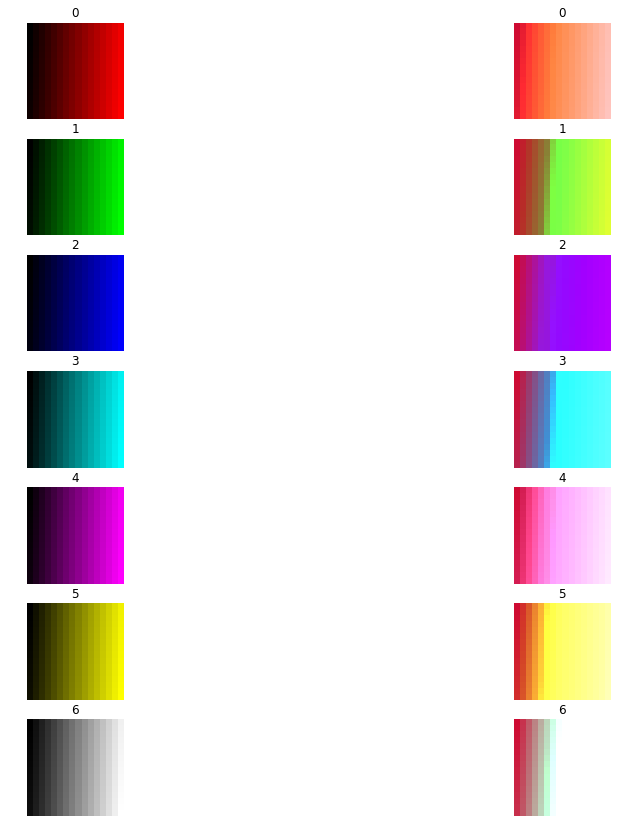

Of course, there are many more pixel values possible than those 7 pictures can contain, and the function can be highly non linear. In order to judge the effect, the pictures gathered on the web have been processed by those color mapping layers, and the results are in the following table.

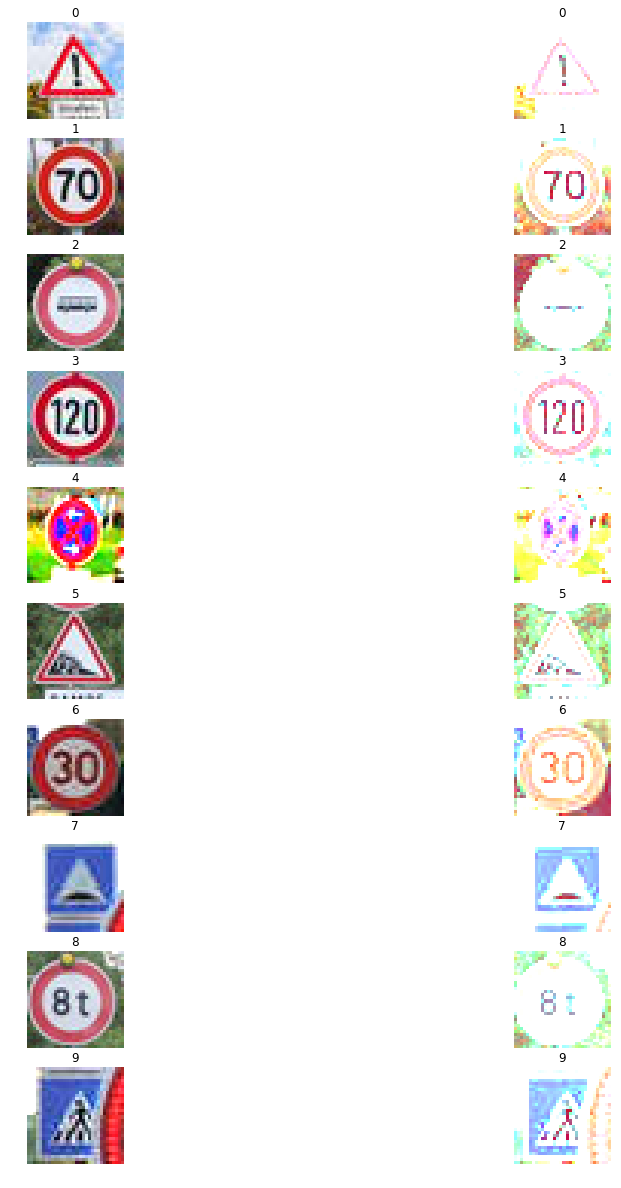

The output seems to correspond to an intuitive application of the color maps depicted in the color shade images. All the dark areas are converted to a reddish tint. The other colors are converted to lighter tints. White is an exception, as it is obvious that anything bright enough to be white is clearly turned into white. It would be interesting to prepare a picture with a color wheel of various tints, in order to see clearly if some tints are favored over others. Note that the preprocessing does no white balancing, so white backgrounds can be yellow or blue depending on ambient light.

Once white areas have been detected and fully saturated to pure white, other layers may be recreating enough contrast to detect all the features. Remember that in the analysis of unknown signs, the white triangle of the pedestrian crossing is seen as a much stronger evidence than the fact that its surrounding is actually blue. The network gives a significant chance of that sign being a right of way, which is a similar white triangle with black symbols in the middle, but has a red outline rather than a blue contour.